## Motivation

- The purpose of this part is to present an initial outline for the tools that can help us in the creation of the Data Story, based on the work done thus far. 
- By iteratively updating, and keeping the outline in mind, we believe it will help us to reflect around how we can present our results in an effective manner throughout the data analysis pipeline. This approach will allow us to keep an open mind to finding new insights throughout the project.  
- On the other hand, being conscious of the data story can also enable us to be more structured in our data analysis process, by developing the story we want to tell and finding the data that can support it. 

## Structure
- The initial outline will be focused on how we could approach communicating the results for the research questions as well as a first outline for in which order it could be natural to present them. 
- Further iterations will aim at becoming more and more focused on creating a coherent story, that is following a well thought-through order to improve readability.

### Q1/ What does the typical patent-holder look like today (Corporation, Universities, Governments, Individuals), and how has that evolved throughout time / geographies?
_Q1.1/ Is a migration of innovators through time visible in the data, e.g. a convergence towards certain innovation centers?  
Q1.2 / How has the number of assignees and inventors evolved through time for different patent types? Are there significant differences in these numbers between different geographies?_  

Get all the patents data for the year 2016.

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pipeline import get_full_year_data, load_preprocessed_data, get_layers_data, load_layers

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import time

**Define path to save all data files**

In [194]:
MY_PATH = '/media/dcm/HDD/ADA_DATA'

**Getting data for Q1**

In [ ]:
full_datafile_lists = {}
full_year_data = {}
year_range = range(2000,2017)

for year in year_range:
    time.sleep(60)
    full_datafile_lists[str(year)] = get_full_year_data(str(year), MY_PATH)

/media/dcm/HDD/ADA_DATA 2000q1
already on file
/media/dcm/HDD/ADA_DATA 2000q2
already on file
/media/dcm/HDD/ADA_DATA 2000q3
already on file
/media/dcm/HDD/ADA_DATA 2000q4
86
fetching first page
fetching page 2
fetching page 3
fetching page 4
fetching page 5
fetching page 6
saving data
/media/dcm/HDD/ADA_DATA 2001q1
86
fetching first page
fetching page 2


In [5]:
for year in year_range:
    full_year_data[str(year)] = load_preprocessed_data(full_datafile_lists[str(year)])

**Checking data**

In [6]:
full_year_data['2016']['num_patents'], full_year_data['2016']['num_citations'], full_year_data['2016']['num_inventors']  

(119682, 2461338, 187117)

In [7]:
full_year_data['2016']['proportion_by_assignee_type'] fil


,0
type,
12,0.000009
13,0.000036
2,0.519733
3,0.466790
4,0.005961
5,0.003199
6,0.003235
7,0.001027
9,0.000009


In [8]:
full_year_data['2016']['proportion_by_patent_type']

,0
index,
utility,0.801232
design,0.191750
plant,0.007019


In [9]:
full_year_data['2016']['assignees'].head()

,type,organization,latitude,longitude
120684,2,"Fortinet, Inc.",37.3688,-122.0360
348786,2,Xerox Corporation,41.1177,-73.4082
73247,2,"MERIDIAN EQUIPMENT, INC.",29.7604,-95.3698
121339,2,"Hewlett-Packard Development Company, L.P.",29.7604,-95.3698
334442,2,"VHDL, Inc",29.9717,-95.6938


In [10]:
full_year_data['2016']['inventors'].head()

,latitude,longitude,assignee
1383149,37.3382,-121.8860,120684
1798151,37.5483,-121.9890,120684
2171910,37.4323,-121.9000,120684
2250909,37.3861,-122.0840,120684
2641780,51.9791,-0.2266,348786


**Example : getting data for Q2**

In [11]:
example_patent_file = get_layers_data('apple_example', MY_PATH, ['9430098'], 4)

/media/dcm/HDD/ADA_DATA apple_example_layer0.json
already on file
/media/dcm/HDD/ADA_DATA apple_example_layer1.json
already on file
/media/dcm/HDD/ADA_DATA apple_example_layer2.json
already on file
/media/dcm/HDD/ADA_DATA apple_example_layer3.json
already on file
saving data


In [12]:
apple_example_data = load_layers(example_patent_file)

**Checking data**

In [13]:
apple_example_data['0']['inventors']

,latitude,longitude
1221243,37.9476,-122.525
3146580,33.6846,-117.826
3317742,37.3852,-122.114


In [14]:
apple_example_data['1']['inventors']

,latitude,longitude
1878402,48.8638,2.44845
2212351,48.8566,2.35222
2212352,48.8566,2.35222
2824276,13.0423,77.61360
503175,48.8130,2.23847


In [158]:
len(apple_example_data['0']['inventors']), len(apple_example_data['1']['inventors']), len(apple_example_data['2']['inventors']), len(apple_example_data['3']['inventors'])

(3, 5, 44, 338)

### Approach Q1
- Question 1 can be a natural way to progress after e.g. a short introduction about patents itself, providing the reader with insight into the main sources of patent creation as well as the potentially historic overview of the same metric.  
- Q1.1 focuses on how data evolves through time from a geographic standpoint, and using  maps to visualize the migration could be a good approach. Below (Q2) interactive graphs are discussed and this could be one alternative here as well. 
    - One approach is to use several maps from ascending chronological periods of time where the reader could see if patterns of innovation centers emerge
    - Another approach could be an interactive chart that enables toggling between different time periods by the reader, enabling comparison by using a single map.
- Q1.2. can potentially provide a good segway into what we brought up in the Project's abstract: _"While innovation is often portrayed as the product of either one charismatic leader - or a ragtag team of geniuses - in reality we suspect that innovations, however important, happen in small steps supported by large networks of people."_
    - This will also be addressed in more detail in research question 2.
    - Various barplots or line plots could provide helpful tools for answering the first part of the question, while the same tools might also be an initial way to approach the second part, after segmenting the data into geographies. Maps could also be explored here.

In [81]:
def get_chart_color(patent_type):
    if patent_type == 'defensive publication' :
        return (18/255, 36/255, 37/255)
    
    if patent_type == 'design' :
        return (33/255, 75/255, 99/255)
    
    if patent_type == 'plant' :
        return (79/255, 129/255, 102/255)
    
    if patent_type == 'reissue' :
        return (151/255, 179/255, 100/255)
    
    if patent_type == 'statutory invention registration' :
        return (175/255, 49/255, 35/255)
    
    if patent_type == 'utility' :
        return (36/255, 73/255, 147/255)

In [187]:
def fig_param(year1) :
    
    year1 = str(year1)
    year2 = year1
    patent_type_dist_y1 = full_year_data[year1]['proportion_by_patent_type']
    patent_type_dist_y2 = full_year_data[year2]['proportion_by_patent_type']
    
    fig = plt.figure()
    gs = gridspec.GridSpec(3, 2, wspace=0.5, hspace=0, height_ratios=[2, 1, 1]) # 3x2 grid
    ax0 = fig.add_subplot(gs[0, 0]) # first row, first col
    ax1 = fig.add_subplot(gs[0, 1]) # first row, second col
    ax2 = fig.add_subplot(gs[1, :]) # full second row
    ax3 = fig.add_subplot(gs[2, :])
    
    patches1, texts1, autotexts1 = ax0.pie(patent_type_dist_y1.values, labels = patent_type_dist_y1.index.values, 
                                           colors = [get_chart_color(p) for p in patent_type_dist_y1.index.values], 
                                           autopct='%1.1f%%', shadow=True)
    ax0.set_title(year1, size = 30)
    
    patches2, texts2, autotexts2 = ax1.pie(patent_type_dist_y2.values, labels = patent_type_dist_y2.index.values, 
                                           colors = [get_chart_color(p) for p in patent_type_dist_y2.index.values], 
                                           autopct='%1.1f%%', shadow=True)
    ax1.set_title(year2, size = 30)
    
    for text in np.hstack([texts1, texts2, autotexts1, autotexts2]):
        text.set_fontsize(20)

        
    ax2.set_xticks([])
    ax3.yaxis.tick_right()
        
        
    fig.set_size_inches(14,12)
    plt.show()


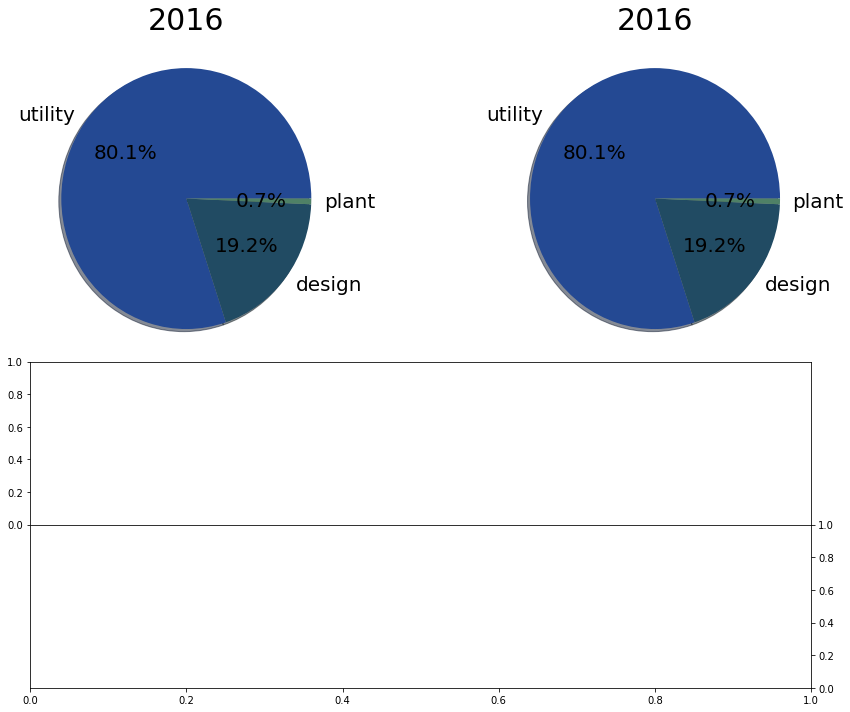

In [188]:
interactive(fig_param, year1 = (2014, 2018,1))

In [ ]:
import gc
import folium
import numpy as np
import pandas as pd
from datetime import datetime
from collections import namedtuple

In [ ]:
def get_arrows(locations, color='blue', size=6, n_arrows=3):
    
    '''
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3

    Return
    list of arrows/markers
    '''
    
    Point = namedtuple('Point', field_names=['lat', 'lon'])
    
    # creating point from our Point named tupleb
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])
    
    # getting the rotation needed for our marker.  
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90
    
    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]
    
    arrows = []
    
    #creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(folium.RegularPolygonMarker(location=points, 
                      fill_color=color, number_of_sides=3, 
                      radius=size, rotation=rotation).add_to(m))
    return arrows

In [ ]:
def get_bearing(p1, p2):
    
    '''
    Returns compass bearing from p1 to p2
    
    Parameters
    p1 : namedtuple with lat lon
    p2 : namedtuple with lat lon
    
    Return
    compass bearing of type float
    
    Notes
    Based on https://gist.github.com/jeromer/2005586
    '''
    
    long_diff = np.radians(p2.lon - p1.lon)
    
    lat1 = np.radians(p1.lat)
    lat2 = np.radians(p2.lat)
    
    x = np.sin(long_diff) * np.cos(lat2)
    y = (np.cos(lat1) * np.sin(lat2) 
        - (np.sin(lat1) * np.cos(lat2) 
        * np.cos(long_diff)))

    bearing = np.degrees(np.arctan2(x, y))
    
    # adjusting for compass bearing
    if bearing < 0:
        return bearing + 360
    return bearing

In [ ]:
earth_center = (44.63, 28.77)
m = folium.Map(earth_center ,tiles='cartodbpositron', zoom_start=2)
for i in range(round(len(inventors['location'])/1000)):
    folium.Marker(inventors['location'][i], popup=str(i), icon=folium.Icon(color='red')).add_to(m)
    folium.Marker(inventors['last_location'][i], popup=str(i), icon=folium.Icon(color='green')).add_to(m)
    folium.PolyLine([inventors['location'][i], inventors['last_location'][i]], color='blue').add_to(m)
    arrows = get_arrows([inventors['location'][i], inventors['last_location'][i]], n_arrows=3)
    for arrow in arrows:
        arrow.add_to(m)
m


In [ ]:
patents.head()

In [ ]:
assignees.head()

In [ ]:
inventors.head()

In [ ]:
citations.head()

**patents_by_type dict**

In [ ]:
# Create a dictionnary whose keys are patents types
patents_by_type = {}
for t in patents.type.unique():
    patents_by_type[t] = patents[patents.type==t].drop("type",axis=1)

**inventor_to_dates dict**

In [ ]:
# To access dates at which a specific inventor has proposed patents
inventor_to_dates = {}
for t in patents.type.unique():
    inventor_to_dates[t]={}
    for index, row in patents_by_type[t].iterrows():
        for inventor in row.inventors:
            inventor_to_dates[t].setdefault(inventor,[]).append(row.date)

**date_to_inventors dict**

In [ ]:
# To access inventors that have published at a specific date
date_to_inventors = {}
for t in patents.type.unique():
    date_to_inventors[t]={}
    for index, row in patents_by_type[t].iterrows():
        date = datetime.strptime(row.date,'%Y-%m-%d')
        date_to_inventors[t].setdefault(date,[]).extend(row.inventors)

In [ ]:
from folium import plugins

map_hooray = folium.Map(earth_center,
                    zoom_start = 1) 

latitude_inventors, longitude_inventors = map(list, zip(*inventors['last_location'].values))
heat_df = pd.DataFrame({'Latitude' : latitude_inventors,
                       'Longitude' : longitude_inventors})

# Create weight column, using date
heat_df['Weight'] = df_acc['Date'].str[3:5]
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])

# List comprehension
#to make out list of lists
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,13)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map_hooray)
# Display the map
map_hooray

### Q2/ How can we best identify and visualize different geographical innovation networks? Can we estimate the number of people in such networks?
_Q2.1/ If we then take a few examples of different types of companies and look at the network of patents supporting their own patents, will these networks match up with the former innovation networks, or will they be more self-contained? In the latter case, can we estimate the number of people that make up these networks? Are these innovation networks concentrated around specific areas, or are they spread out ?  
Q2.2/ Do similar companies use the same knowledge bases to innovate? For example, if we look at different social networking companies, will the networks supporting their patents be distinct? Will a given companies patents mostly cite their own previous patents, or will they tap outside innovation networks? On what scale?  
Q2.3/ What about if we look at university/academic knowledge bases and compare them with those of the companies analyzed above?   
Q2.4/ What about governmental or non-governmental organizations, or international agencies?    
Q2.5/ How have the innovation networks identified above evolved through time?_ 

### Approach Q2
- For the geographically focused research question, a natural approach can be to explore the data using maps to visualize e.g. the innovation networks.  
- In HW2 we worked with **Folium**, which can be one interesting tool here, as we have access to clean longitude- and latitude data (see preprocessing.ipynb). Folium has e.g. cluster-functionality, which could be a way to quantify the magnitude of the networks in different geographic zones. 
    - Folium also gives us the option to add interactivity.
- To represent networks, an alternative could be to use a graph-based approach, where relationships between entities within a network could be represented by nodes and edges. The Python library **networkx**, which enables the creation of Network Graphs, is one option. 
    - Network representations could also be relevant to answer question 2.2, when exploring the citation of patents from similar companies. 
- Throughout the data story, the usage of **interactive graphs** could be particularly efficient in making the plots self-sufficient and to invite exploration by the reader. Adding the element of time can enable comparing the development of innovation networks, and by hovering over parts of the map the reader can obtain more detailed information. 
    - The Python library **HoloViews** can, alongside networkx, enable the creation of interactive network graphs. 
    - Another interactive visualization library to explore is **Bokeh**.
- Questions Q2.1-2. could provide tangible examples for how prevalent (or not) patent networks are for well-known companies.
- By following these results with those of questions Q2.3-4 we believe it could provide a good overview into the similarities and/or differences between the three major categories of organizations (academia, non-governmental and governmental organizations), hence being of interest to readers within various field, and also (hopefully) providing input to our peers (students) that might be interested in research and innovation, and that might contemplate various possible tracks for their careers.  

In summary, the visualization techniques, as well as the amount of interactivity to add, if any, we decide upon will have a big impact on the quality of the data story. This latter is intended to be eventually recounted on a website spitted out by Jekyll, a static site generator.